### **Importing Libraries**

In [401]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import median_absolute_error, r2_score, explained_variance_score, mean_absolute_percentage_error, PredictionErrorDisplay

### **Loading Data**

In [349]:
CaliforniaHousingDF = pd.read_csv("CaliforniaHousingPrice.csv")
CaliforniaHousingDF

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### **Exploratory Data Analysis**

In [350]:
CaliforniaHousingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [351]:
CaliforniaHousingDF.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [352]:
CaliforniaHousingDF.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [353]:
CaliforniaHousingDF.tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20630,-121.32,39.29,11.0,2640.0,505.0,1257.0,445.0,3.5673,112000.0,INLAND
20631,-121.40,39.33,15.0,2655.0,493.0,1200.0,432.0,3.5179,107200.0,INLAND
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [354]:
#Checking missing values
CaliforniaHousingDF.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [355]:
#Checking duplicated values
CaliforniaHousingDF.duplicated().sum()

0

In [356]:
# Handling missing values with the mean of bedrooms
CaliforniaHousingDF['total_bedrooms'] = CaliforniaHousingDF['total_bedrooms'].fillna(CaliforniaHousingDF['total_bedrooms'].mean())

In [357]:
CaliforniaHousingDF.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [358]:
CaliforniaHousingDF.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### **Separating numerical and categorical features**

In [359]:
categorical_features = CaliforniaHousingDF.select_dtypes(include=["object"]).columns
numerical_features = CaliforniaHousingDF.columns.drop(categorical_features)
target = 'median_house_value'

### **Analysing the relationship among the features and target**

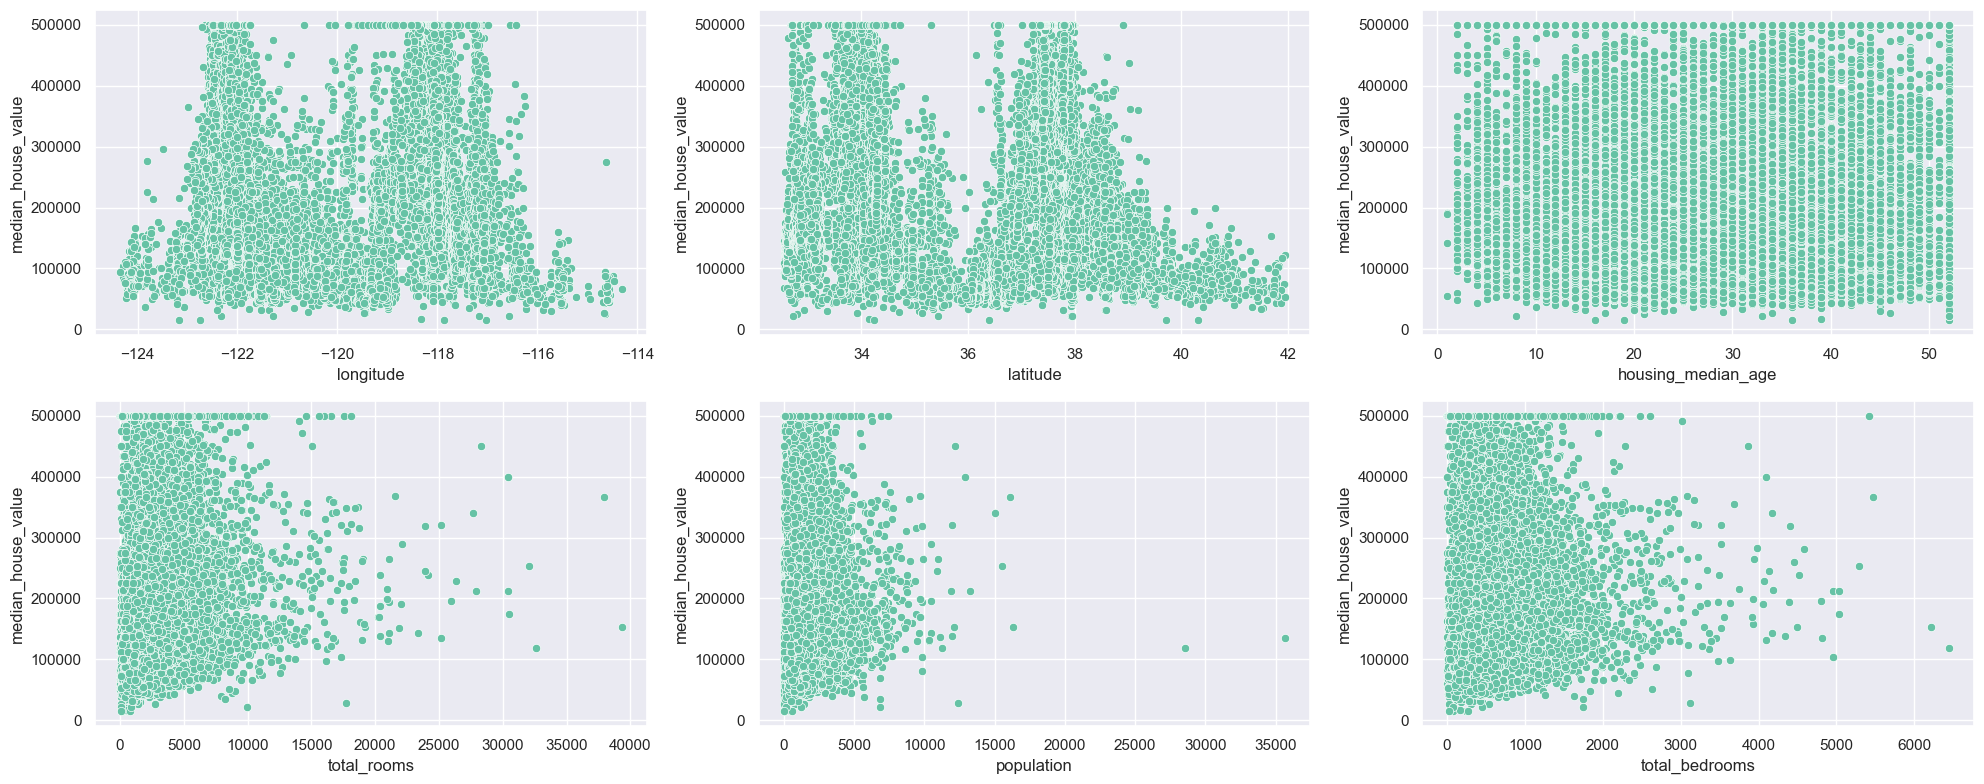

In [360]:
sns.set(style="darkgrid", palette="Set2")
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20,8))
for i in range(0,6):
    if i < 3:
        sns.scatterplot(data=CaliforniaHousingDF, x=numerical_features[i], y=target, ax=axes[0,i])
    else:
        sns.scatterplot(data=CaliforniaHousingDF, x=numerical_features[i], y=target, ax=axes[1,3-i])
plt.grid(True)
plt.tight_layout()
plt.show()

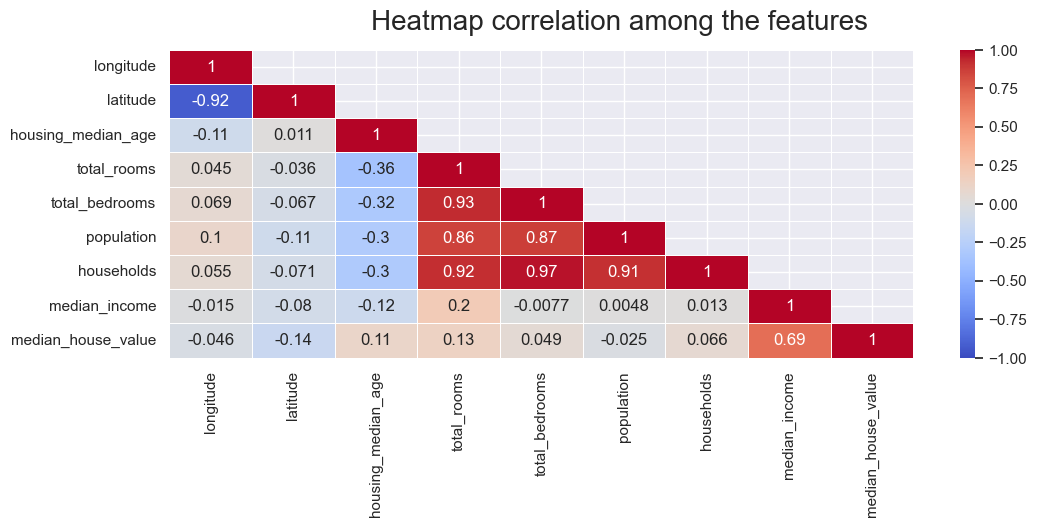

In [361]:
plt.figure(figsize=(12,4))
plt.suptitle("Heatmap correlation among the features", fontsize=20)
mask = np.triu(np.ones_like(CaliforniaHousingDF[numerical_features].corr(), dtype=bool), k=1)
sns.heatmap(data=CaliforniaHousingDF[numerical_features].corr(), vmax=1, vmin=-1, annot=True, mask=mask, linewidths=0.5, cmap="coolwarm")
plt.show()

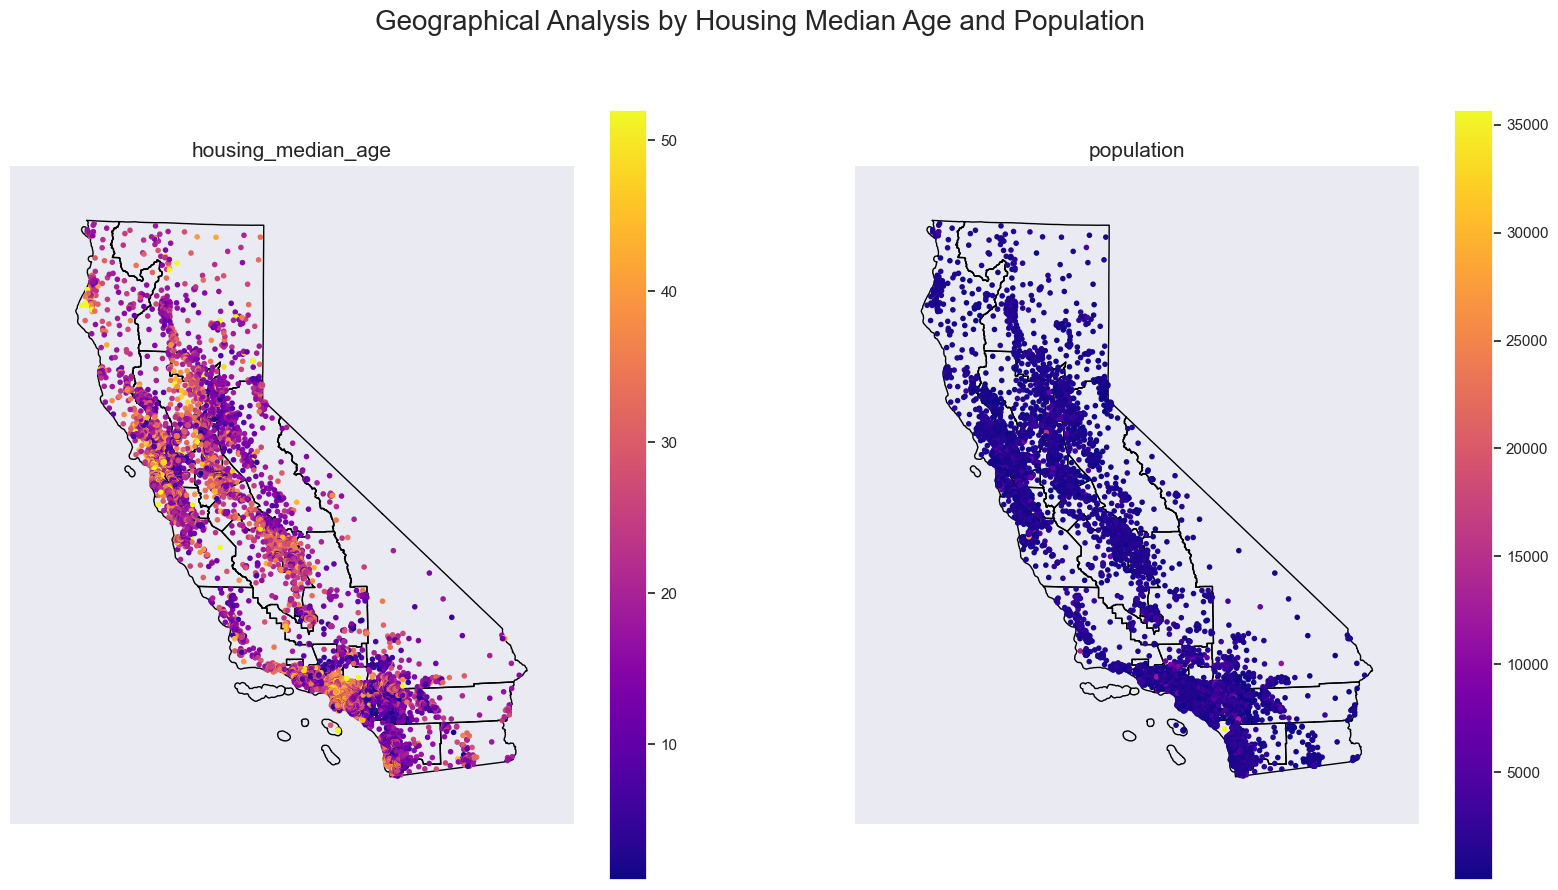

<Figure size 640x480 with 0 Axes>

In [362]:
df_geo = gpd.GeoDataFrame(CaliforniaHousingDF, geometry=gpd.points_from_xy(CaliforniaHousingDF.longitude, CaliforniaHousingDF.latitude))

sns.set(style="darkgrid", palette="pastel")

cali = gpd.read_file(gplt.datasets.get_path('california_congressional_districts'))
proj= gcrs.AlbersEqualArea(central_latitude=37.16611, central_longitude=-119.44944)

fig, axes = plt.subplots(1, 2, figsize=(20,10), subplot_kw={"projection": proj})
plt.suptitle("Geographical Analysis by Housing Median Age and Population", fontsize=20)
values = ["housing_median_age", "population"]

for i, value in enumerate(values):
    gplt.polyplot(cali, projection=proj, ax=axes[i])
    gplt.pointplot(df_geo, hue=value, cmap="plasma", legend=True, alpha=1.0, s=3, ax=axes[i])
    axes[i].set_title(value, fontsize=15)

plt.show()
plt.subplots_adjust(wspace=-0.5)

### **Numerical Features Distribution**

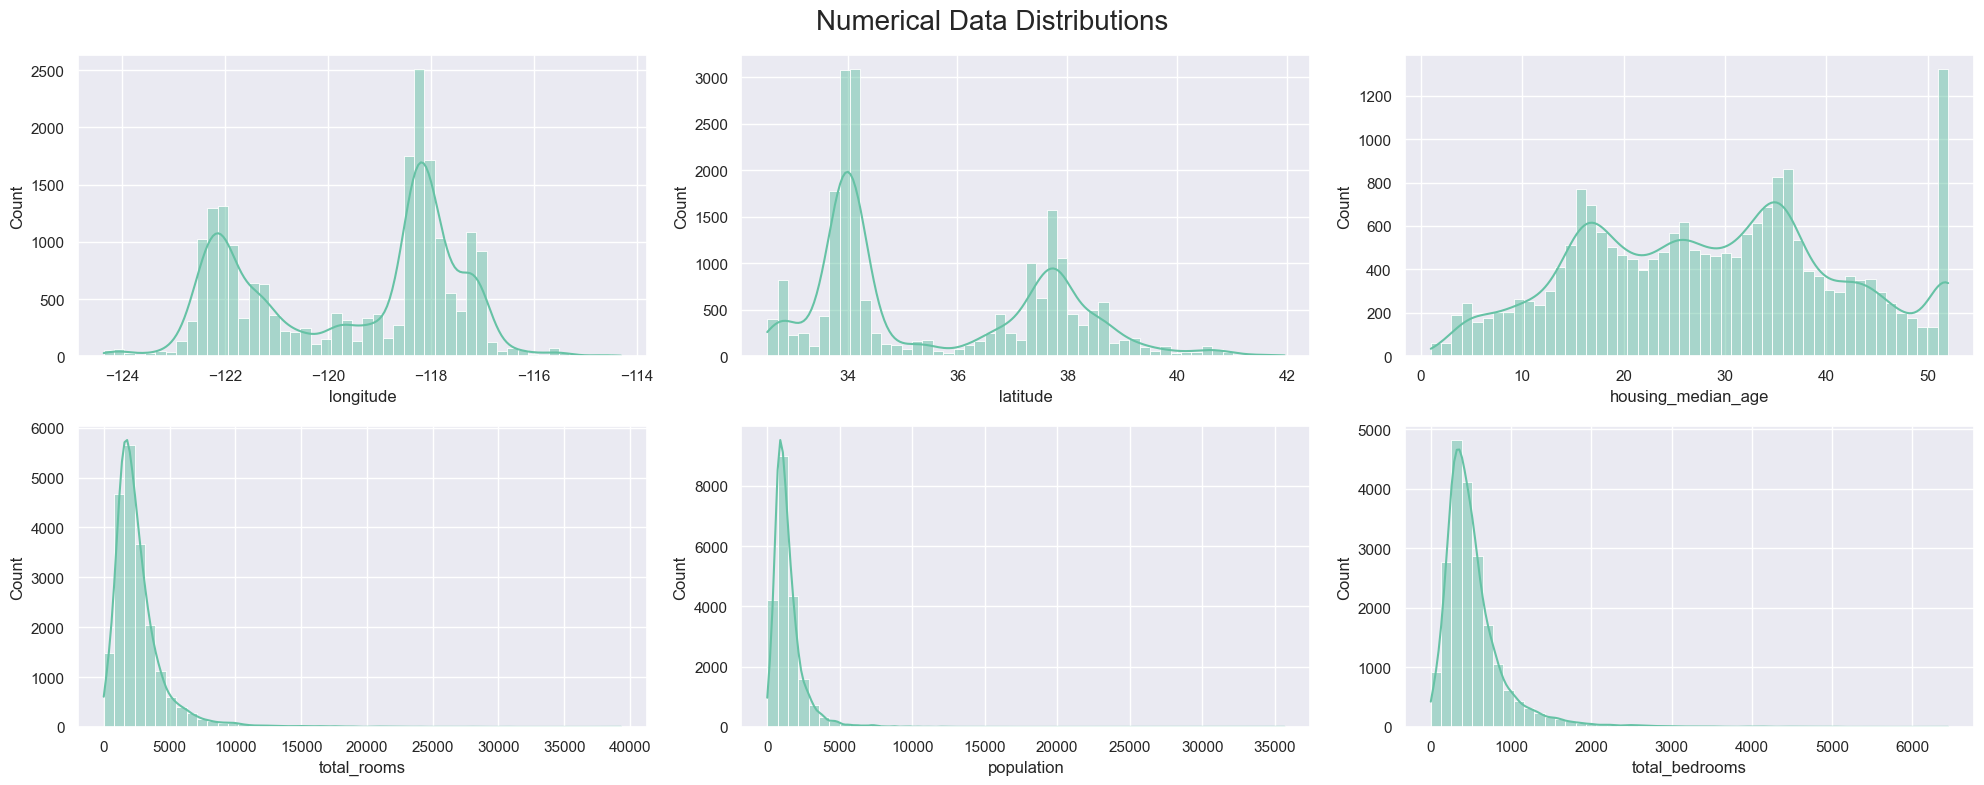

In [363]:
sns.set(style="darkgrid", palette="Set2")
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20,8))
plt.suptitle("Numerical Data Distributions", fontsize=20)
for i in range(0,6):
    if i < 3:
        sns.histplot(data=CaliforniaHousingDF, x=numerical_features[i], ax=axes[0,i], bins=50, kde=True)
    else:
        sns.histplot(data=CaliforniaHousingDF, x=numerical_features[i], ax=axes[1,3-i], bins=50, kde=True)
plt.tight_layout()
plt.grid(True)
plt.show()

### **Checking Outliers**

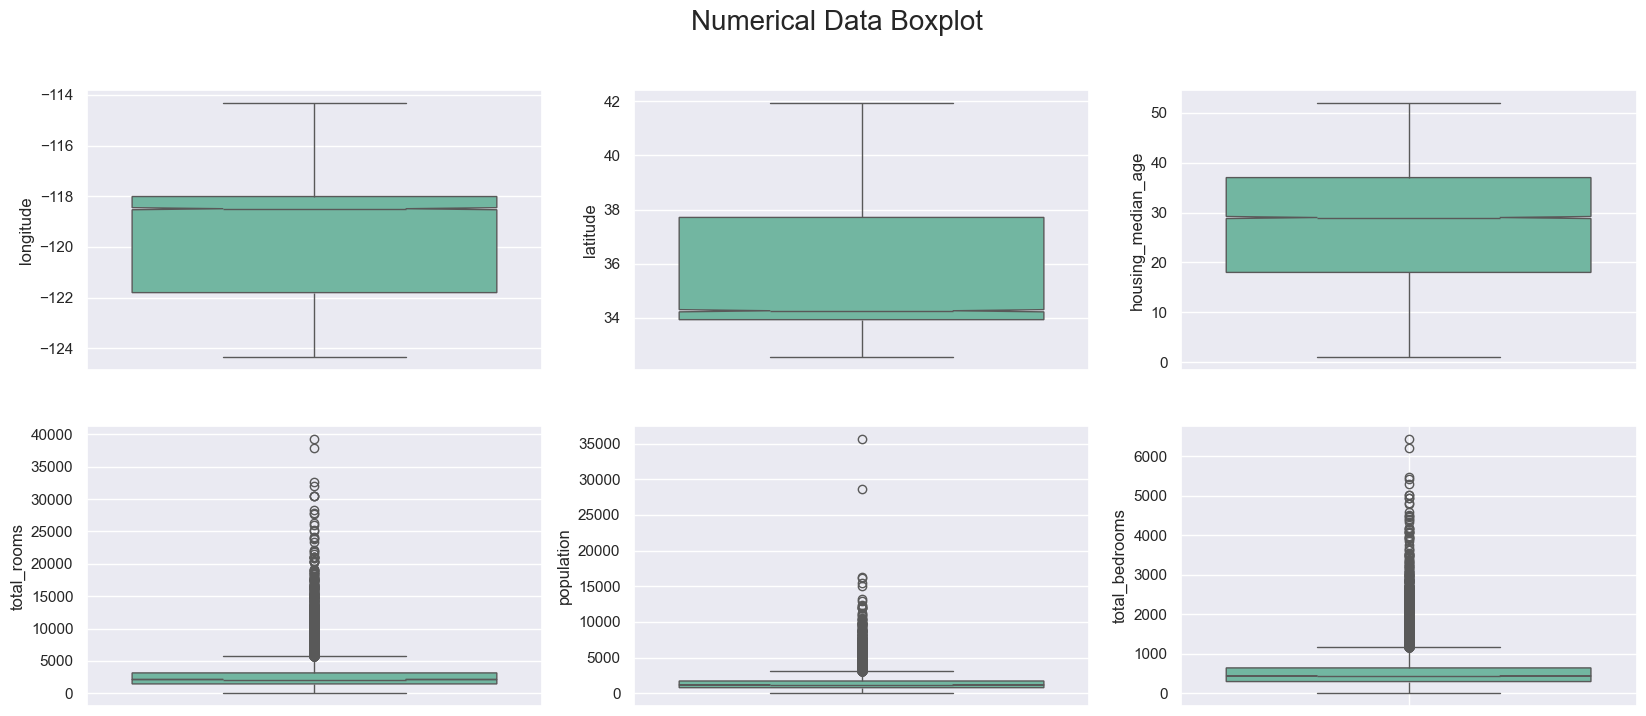

In [364]:
sns.set(style="darkgrid", palette="Set2")
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20,8))
plt.suptitle("Numerical Data Boxplot", fontsize=20)
for i in range(0,6):
    if i < 3:
        sns.boxplot(y=CaliforniaHousingDF[numerical_features[i]], notch=True, ax=axes[0,i])
    else:
        sns.boxplot(y=CaliforniaHousingDF[numerical_features[i]], notch=True, ax=axes[1,3-i])
plt.grid(True)
plt.show()

### **Handling Outliers**

#### **Total Rooms**

In [365]:
# Removing Outliers applying IQR (Inter Quartile Range) 
Q1 = CaliforniaHousingDF['total_rooms'].quantile(0.25)
Q3 = CaliforniaHousingDF['total_rooms'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [366]:
# Above Upper bound
upper_array = np.array(CaliforniaHousingDF['total_rooms'] >= upper_bound)
print("Upper Bound:", upper_bound)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(CaliforniaHousingDF['total_rooms'] <= lower_bound)
print("Lower Bound:", lower_bound)
print(lower_array.sum())

Upper Bound: 5698.375
1287
Lower Bound: -1102.625
0


In [367]:
# Create arrays values indicating the outlier rows
lower_bound_array = np.where(CaliforniaHousingDF['total_rooms']<=lower_bound)[0]
upper_bound_array = np.where(CaliforniaHousingDF['total_rooms']>=upper_bound)[0]

# Replacing outliers with NaN
CaliforniaHousingDF.loc[lower_bound_array,'total_rooms'] = np.nan
CaliforniaHousingDF.loc[upper_bound_array,'total_rooms'] = np.nan

#### **Total Bedrooms**

In [368]:
# Removing Outliers applying IQR (Inter Quartile Range) 
Q1 = CaliforniaHousingDF['total_bedrooms'].quantile(0.25)
Q3 = CaliforniaHousingDF['total_bedrooms'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [369]:
# Above Upper bound
upper_array = np.array(CaliforniaHousingDF['total_bedrooms'] >= upper_bound)
print("Upper Bound:", upper_bound)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(CaliforniaHousingDF['total_bedrooms'] <= lower_bound)
print("Lower Bound:", lower_bound)
print(lower_array.sum())

Upper Bound: 1162.625
1306
Lower Bound: -222.375
0


In [370]:
# Create arrays values indicating the outlier rows
lower_bound_array = np.where(CaliforniaHousingDF['total_bedrooms']<=lower_bound)[0]
upper_bound_array = np.where(CaliforniaHousingDF['total_bedrooms']>=upper_bound)[0]

# Replacing outliers with NaN
CaliforniaHousingDF.loc[lower_bound_array,'total_bedrooms'] = np.nan
CaliforniaHousingDF.loc[upper_bound_array,'total_bedrooms'] = np.nan

#### **Population**

In [371]:
# Removing Outliers applying IQR (Inter Quartile Range) 
Q1 = CaliforniaHousingDF['population'].quantile(0.25)
Q3 = CaliforniaHousingDF['population'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [372]:
# Above Upper bound
upper_array = np.array(CaliforniaHousingDF['population'] >= upper_bound)
print("Upper Bound:", upper_bound)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(CaliforniaHousingDF['population'] <= lower_bound)
print("Lower Bound:", lower_bound)
print(lower_array.sum())

Upper Bound: 3132.0
1198
Lower Bound: -620.0
0


In [373]:
# Create arrays values indicating the outlier rows
lower_bound_array = np.where(CaliforniaHousingDF['population']<=lower_bound)[0]
upper_bound_array = np.where(CaliforniaHousingDF['population']>=upper_bound)[0]

# Replacing outliers with NaN
CaliforniaHousingDF.loc[lower_bound_array,'population'] = np.nan
CaliforniaHousingDF.loc[upper_bound_array,'population'] = np.nan

#### **Median Income**

In [374]:
# Removing Outliers applying IQR (Inter Quartile Range) 
Q1 = CaliforniaHousingDF['median_income'].quantile(0.25)
Q3 = CaliforniaHousingDF['median_income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [375]:
# Above Upper bound
upper_array = np.array(CaliforniaHousingDF['median_income'] >= upper_bound)
print("Upper Bound:", upper_bound)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(CaliforniaHousingDF['median_income'] <= lower_bound)
print("Lower Bound:", lower_bound)
print(lower_array.sum())

Upper Bound: 8.013024999999999
681
Lower Bound: -0.7063750000000004
0


In [376]:
# Create arrays values indicating the outlier rows
lower_bound_array = np.where(CaliforniaHousingDF['median_income']<=lower_bound)[0]
upper_bound_array = np.where(CaliforniaHousingDF['median_income']>=upper_bound)[0]

# Replacing outliers with NaN
CaliforniaHousingDF.loc[lower_bound_array,'median_income'] = np.nan
CaliforniaHousingDF.loc[upper_bound_array,'median_income'] = np.nan

#### **Households**

In [377]:
# Removing Outliers applying IQR (Inter Quartile Range) 
Q1 = CaliforniaHousingDF['households'].quantile(0.25)
Q3 = CaliforniaHousingDF['households'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [378]:
# Above Upper bound
upper_array = np.array(CaliforniaHousingDF['households'] >= upper_bound)
print("Upper Bound:", upper_bound)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(CaliforniaHousingDF['households'] <= lower_bound)
print("Lower Bound:", lower_bound)
print(lower_array.sum())

Upper Bound: 1092.5
1220
Lower Bound: -207.5
0


In [379]:
# Create arrays values indicating the outlier rows
lower_bound_array = np.where(CaliforniaHousingDF['households']<=lower_bound)[0]
upper_bound_array = np.where(CaliforniaHousingDF['households']>=upper_bound)[0]

# Replacing outliers with NaN
CaliforniaHousingDF.loc[lower_bound_array,'households'] = np.nan
CaliforniaHousingDF.loc[upper_bound_array,'households'] = np.nan

In [380]:
# Checking the null values
CaliforniaHousingDF.isna().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms           1287
total_bedrooms        1306
population            1198
households            1220
median_income          681
median_house_value       0
ocean_proximity          0
dtype: int64

In [381]:
CaliforniaHousingDF.dropna(inplace=True)

In [382]:
CaliforniaHousingDF.shape

(18172, 10)

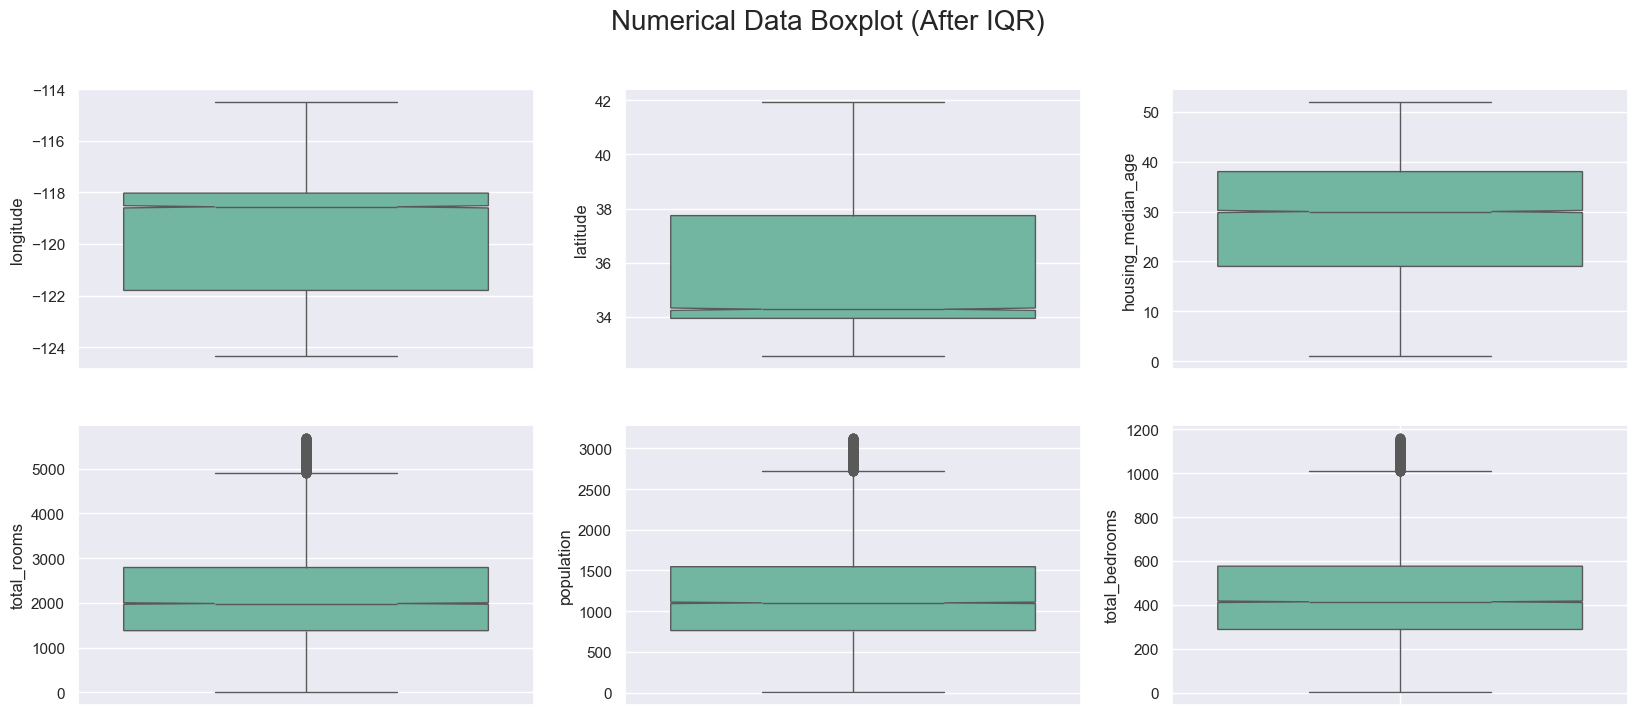

In [383]:
sns.set(style="darkgrid", palette="Set2")
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20,8))
plt.suptitle("Numerical Data Boxplot (After IQR)", fontsize=20)
for i in range(0,6):
    if i < 3:
        sns.boxplot(y=CaliforniaHousingDF[numerical_features[i]], notch=True, ax=axes[0,i])
    else:
        sns.boxplot(y=CaliforniaHousingDF[numerical_features[i]], notch=True, ax=axes[1,3-i])
plt.grid(True)
plt.show()

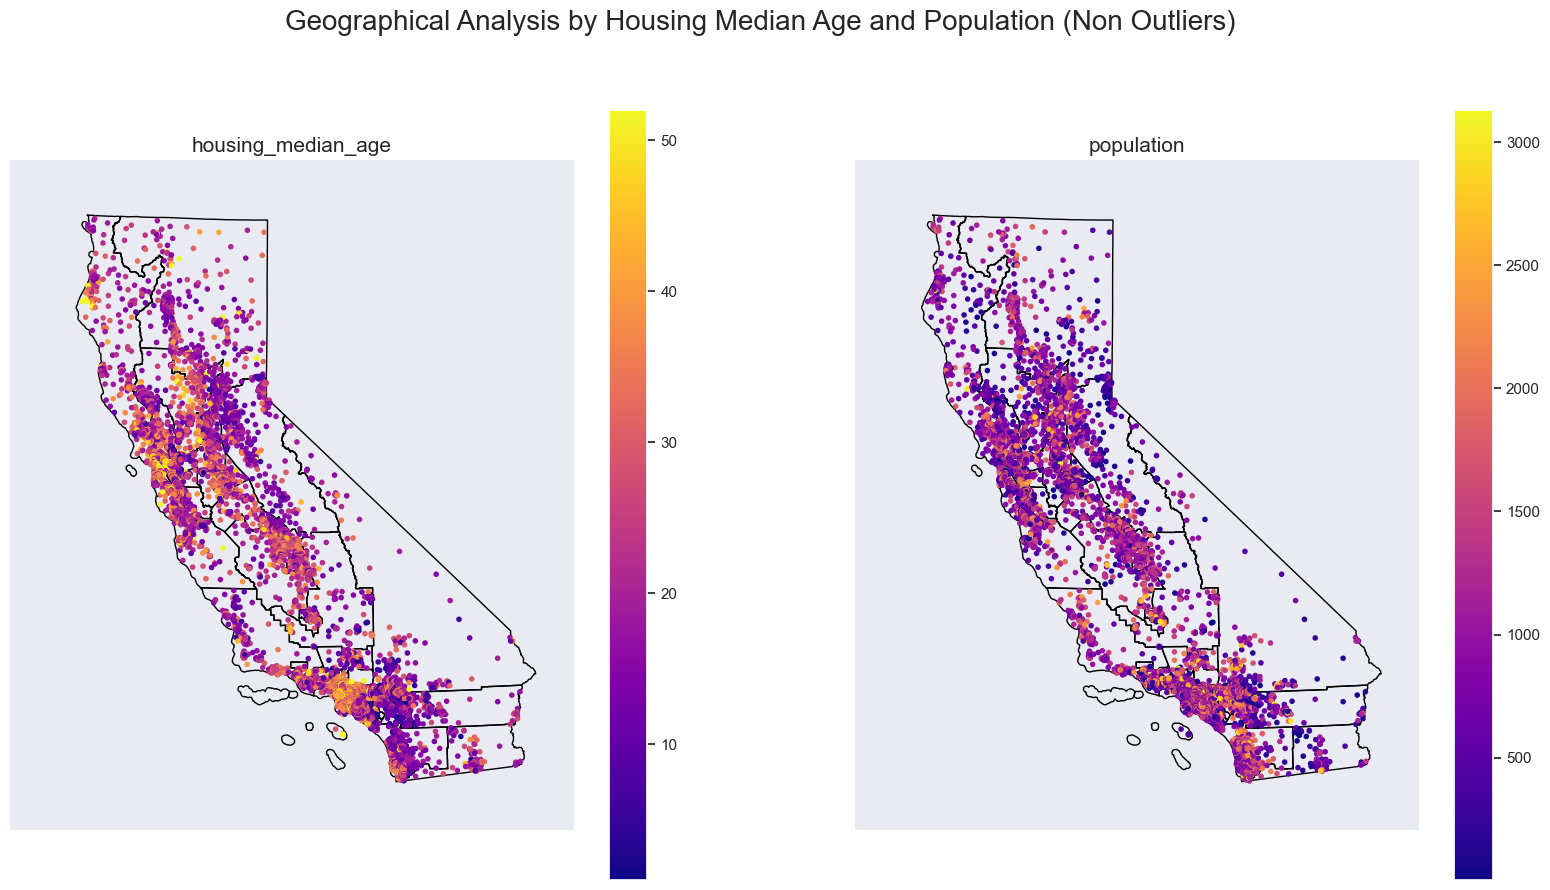

<Figure size 640x480 with 0 Axes>

In [384]:
df_geo = gpd.GeoDataFrame(CaliforniaHousingDF, geometry=gpd.points_from_xy(CaliforniaHousingDF.longitude, CaliforniaHousingDF.latitude))

sns.set(style="darkgrid", palette="pastel")

cali = gpd.read_file(gplt.datasets.get_path('california_congressional_districts'))
proj= gcrs.AlbersEqualArea(central_latitude=37.16611, central_longitude=-119.44944)

fig, axes = plt.subplots(1, 2, figsize=(20,10), subplot_kw={"projection": proj})
plt.suptitle("Geographical Analysis by Housing Median Age and Population (Non Outliers)", fontsize=20)
values = ["housing_median_age", "population"]

for i, value in enumerate(values):
    gplt.polyplot(cali, projection=proj, ax=axes[i])
    gplt.pointplot(df_geo, hue=value, cmap="plasma", legend=True, alpha=1.0, s=3, ax=axes[i])
    axes[i].set_title(value, fontsize=15)

plt.show()
plt.subplots_adjust(wspace=-0.5)

### **Encoding Categorical Values**

In [385]:
categorical_features_encoded = pd.get_dummies(CaliforniaHousingDF[categorical_features]).astype(int)
categorical_features_encoded

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


### **Normalising the dataset**

In [386]:
X = pd.concat([CaliforniaHousingDF[numerical_features], categorical_features_encoded], axis=1)
y = CaliforniaHousingDF[target]

In [387]:
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

array([[0.21399594, 0.5642933 , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.21298174, 0.5642933 , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.21298174, 0.5642933 , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.31744422, 0.73219979, 0.31372549, ..., 0.        , 0.        ,
        0.        ],
       [0.30730223, 0.73219979, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.31541582, 0.72582359, 0.29411765, ..., 0.        , 0.        ,
        0.        ]])

### **Spliting the dataset**

In [388]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [389]:
X_train, len(X_train)

(array([[0.23326572, 0.58023379, 0.29411765, ..., 0.        , 1.        ,
         0.        ],
        [0.29107505, 0.64187035, 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.59533469, 0.19978746, 0.39215686, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.67139959, 0.16259299, 0.62745098, ..., 0.        , 0.        ,
         0.        ],
        [0.23529412, 0.53134963, 0.66666667, ..., 0.        , 1.        ,
         0.        ],
        [0.24036511, 0.50690755, 0.52941176, ..., 0.        , 0.        ,
         0.        ]]),
 14537)

In [390]:
X_test, len(X_test)

(array([[0.63083164, 0.13496281, 0.70588235, ..., 0.        , 0.        ,
         0.        ],
        [0.34178499, 0.53453773, 0.50980392, ..., 0.        , 0.        ,
         0.        ],
        [0.59939148, 0.15834219, 0.70588235, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.23833671, 0.50371945, 0.66666667, ..., 0.        , 0.        ,
         0.        ],
        [0.61967546, 0.15302869, 0.8627451 , ..., 0.        , 0.        ,
         0.        ],
        [0.60344828, 0.17534538, 0.66666667, ..., 0.        , 0.        ,
         0.        ]]),
 3635)

### **Selecting Models**

In [391]:
# Creating the grid models

models = {"linear_regression": LinearRegression(),
          "decision_tree": DecisionTreeRegressor(),
          "gradient_boost": GradientBoostingRegressor(),
          "kneighbors": KNeighborsRegressor()}

In [392]:
# Random seed for reproducible results
np.random.seed(42)

models_scores = {}

for name, model in models.items():

    # Fitting and evaluating the models
    model.fit(X_train, y_train)
    models_scores[name] = model.score(X_test, y_test)

In [393]:
model_comparison = pd.DataFrame(data=models_scores, index=["accuracy"])
model_comparison

,linear_regression,decision_tree,gradient_boost,kneighbors
accuracy,1.0,0.999999,0.999941,0.968559


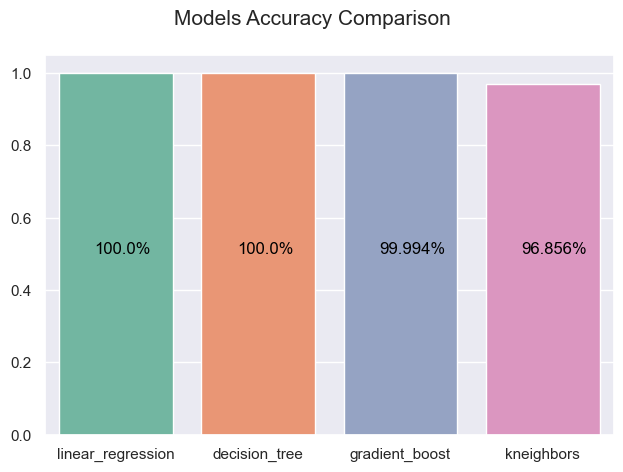

In [394]:
sns.set(style="darkgrid", palette="Set2")
plt.suptitle("Models Accuracy Comparison", fontsize=15)
sns.barplot(model_comparison)
for index, value in enumerate(models_scores.values()):
    plt.text(x=index-0.15, y=0.5, s=(str(round(value,5)*100)+"%"), color="black")
plt.tight_layout()
plt.show()

### **Metrics Evaluations**

In [395]:
# Random seed for reproducible results
np.random.seed(42)

# Due to complexity we are going to choose the Decision Tree Regressor Model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [396]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

In [397]:
print("R2 Score: ", r2score)
print("Mean Absolute Percentage Error: ", round(mape,5))
print("Median Absolute Error: ", round(mae,5))
print("Explained Variance: ", explained_variance)

R2 Score:  0.9999992590894667
Mean Absolute Percentage Error:  0.00012
Median Absolute Error:  0.0
Explained Variance:  0.9999992591662672


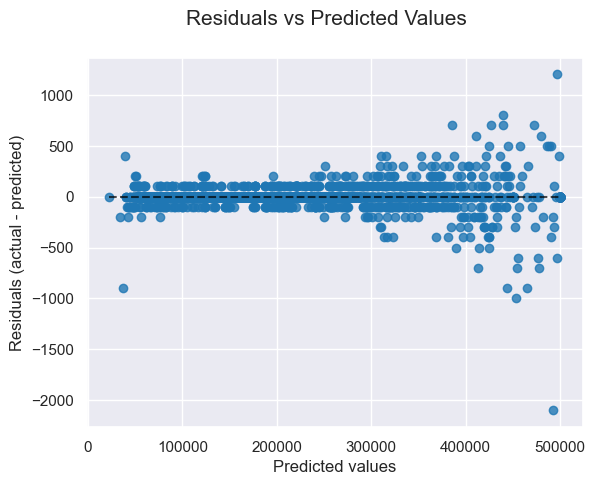

In [424]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()
plt.suptitle("Residuals vs Predicted Values", fontsize=15)
plt.show()